In [2]:
import pandas as pd
import math as math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [5]:
data = pd.read_csv("data.csv",engine='python', delimiter=';')

In [7]:
data = data.fillna('Пропустили вопрос').replace({'Высшее, бакалавр или специалист':'Высшее',
                                              'Высшее, магистр':'Высшее',
                                              'Кандидат наук, доктор наук': 'Высшее',
                                              'Два и более высших образований':'Высшее',
                                              'Среднее профессиональное (например, колледж или техникум)': 'Без высшего',
                                              'Неоконченное высшее':'Без высшего',
                                              'Начальное профессиональное (например, профессиональное училище)': 'Без высшего',
                                              'Среднее (полное) общее или ниже': 'Без высшего',
                                              'Затрудняюсь ответить': 'Пропустили вопрос',
                                                'Нет, но есть детская комната, которую он делит с братом/сестрой (братьями, сестрами)':'Нет, делит с братом/сестрой',
                                                'Нет, ребенок живет в одной комнате со взрослыми родственниками': 'Нет, живет со взрослыми'
                                                })

In [8]:
data_mom_edu = data.loc[data['q86mom_edu'] != 'Пропустили вопрос']

In [147]:
data_mom_edu_2 = data_mom_edu[['q86mom_edu','q14','q87room']]
dummed_mom = pd.get_dummies(data_mom_edu_2['q86mom_edu'])
dummed_mom1 = dummed_mm['Без высшего']
dummed_mom2 = dummed_mom['Высшее']
data_mom_edu_2['Без высшего'] = dummed_mom1
data_mom_edu_2['Высшее'] = dummed_mom2
data_mom_edu_2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,q86mom_edu,q14,q87room,Без высшего,Высшее
2,Высшее,Менее 1 часа в день,"Да, есть своя комната",0,1
3,Высшее,Менее 1 часа в день,"Да, есть своя комната",0,1
4,Высшее,Менее 1 часа в день,"Да, есть своя комната",0,1
7,Без высшего,Менее 1 часа в день,"Нет, делит с братом/сестрой",1,0
8,Высшее,1-2 часа каждый день,"Да, есть своя комната",0,1
...,...,...,...,...,...
2560,Высшее,Вообще не трачу,"Да, есть своя комната",0,1
2562,Высшее,3 и более часов в день,"Да, есть своя комната",0,1
2564,Высшее,Вообще не трачу,"Да, есть своя комната",0,1
2567,Высшее,Вообще не трачу,"Да, есть своя комната",0,1


In [8]:
prop_df = (data_mom_edu_2['q86mom_edu']
           .groupby(data_mom_edu_2['q14'])
           .value_counts())

prop_df = pd.DataFrame(prop_df)
prop_df = prop_df.rename(columns = {'q86mom_edu':'Число ответов'})
prop_df['Число ответов']

prop_df1 = (data_mom_edu['q86mom_edu']
           .groupby(data_mom_edu['q14'])
           .value_counts(normalize=True)
           .rename('sum')
           .reset_index())
c = float()
prop_list = list()
for i in prop_df['Число ответов']:
    c = (i * 100)/1416
    print(c)
    prop_list.append(c)
percent = pd.Series(prop_list)

prop_df2 = prop_df1.drop('sum',axis=1)

prop_df2['perc'] = percent 


17.019774011299436
3.389830508474576
22.951977401129945
5.0141242937853105
22.387005649717516
3.8135593220338984
21.468926553672315
3.9548022598870056


In [10]:
q14_dummies = pd.get_dummies(data_mom_edu_2['q14'])

In [13]:
one_two = q14_dummies['1-2 часа каждый день']
three_nmore = q14_dummies['3 и более часов в день']
nothing = q14_dummies['Вообще не трачу']
less_one = q14_dummies['Менее 1 часа в день']

In [53]:
data_mom_edu_2['1-2 часа каждый день'] = one_two
data_mom_edu_2['3 и более часов в день'] = three_nmore
data_mom_edu_2['Вообще не трачу'] = nothing
data_mom_edu_2['Менее 1 часа в день'] = less_one

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [54]:
data_mom_edu_2

,q86mom_edu,q14,q87room,Без высшего,Высшее,1-2 часа каждый день,3 и более часов в день,Вообще не трачу,Менее 1 часа в день
2,Высшее,Менее 1 часа в день,"Да, есть своя комната",0,1,0,0,0,1
3,Высшее,Менее 1 часа в день,"Да, есть своя комната",0,1,0,0,0,1
4,Высшее,Менее 1 часа в день,"Да, есть своя комната",0,1,0,0,0,1
7,Без высшего,Менее 1 часа в день,"Нет, делит с братом/сестрой",1,0,0,0,0,1
8,Высшее,1-2 часа каждый день,"Да, есть своя комната",0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
2560,Высшее,Вообще не трачу,"Да, есть своя комната",0,1,0,0,1,0
2562,Высшее,3 и более часов в день,"Да, есть своя комната",0,1,0,1,0,0
2564,Высшее,Вообще не трачу,"Да, есть своя комната",0,1,0,0,1,0
2567,Высшее,Вообще не трачу,"Да, есть своя комната",0,1,0,0,1,0


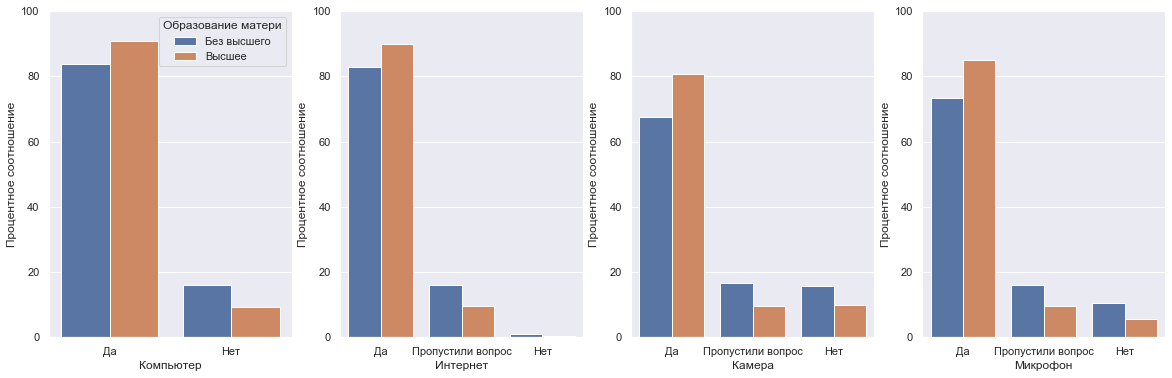

In [591]:
# 2. Вопрос 47-50
data_mom_edu = data_mom_edu.rename(columns={'q47': 'Компьютер',
                                           'q48':'Интернет',
                                           'q49': 'Камера',
                                           'q50':'Микрофон'})
sns.set(style="darkgrid")
fig, ax =plt.subplots(1,4)

plt.rcParams['figure.figsize'] = [20, 6]
prop_df = (data_mom_edu['Компьютер']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='Компьютер',y='Процентное соотношение',hue='q86mom_edu', data=prop_df,ax=ax[0]
            )
g.legend(title='Образование матери')
g.set(ylim=(0, 100))

prop_df = (data_mom_edu['Интернет']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='Интернет',y='Процентное соотношение',hue='q86mom_edu', data=prop_df,ax=ax[1]
            )
g1.legend_.remove()
g1.set(ylim=(0, 100))

prop_df = (data_mom_edu['Камера']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g2 = sns.barplot(x='Камера',y='Процентное соотношение',hue='q86mom_edu', data=prop_df,ax=ax[2]
            )
g2.legend_.remove()
g2.set(ylim=(0, 100))

prop_df = (data_mom_edu['Микрофон']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g3 = sns.barplot(x='Микрофон',y='Процентное соотношение',hue='q86mom_edu', data=prop_df,ax=ax[3]
            )
g3.set(ylim=(0, 100))
g3.legend_.remove()


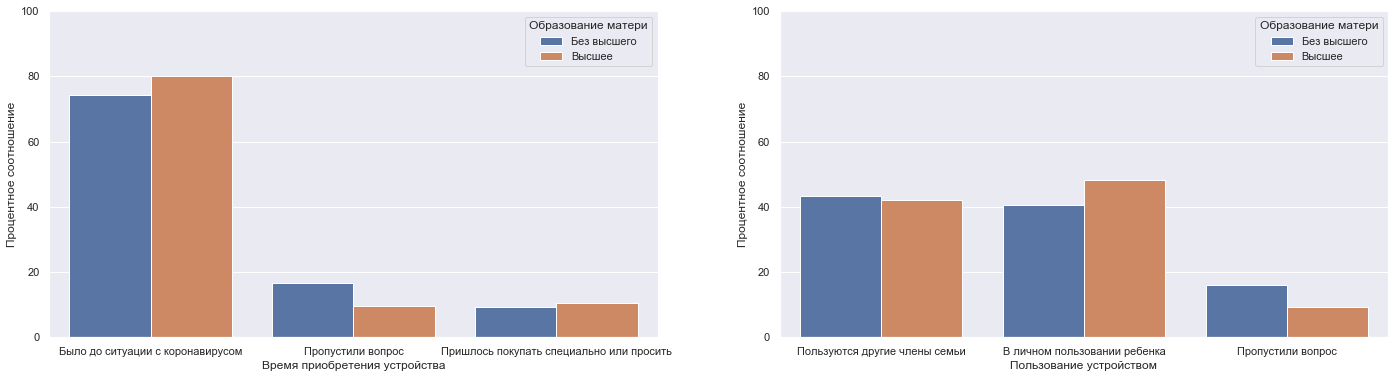

In [334]:
# 1. Вопрос 51-52
data_mom_edu = data_mom_edu.rename(columns={'q51': 'Время приобретения устройства',
                                           'q52':'Пользование устройством'})

sns.set(style="darkgrid")
fig, ax =plt.subplots(1,2)


plt.rcParams['figure.figsize'] = [24, 6]
prop_df = (data_mom_edu['Время приобретения устройства']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='Время приобретения устройства',y='Процентное соотношение',hue='q86mom_edu', data=prop_df,ax=ax[0]
            )
g.set(ylim=(0, 100))
g.legend(title='Образование матери')
prop_df = (data_mom_edu['Пользование устройством']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='Пользование устройством',y='Процентное соотношение',hue='q86mom_edu', data=prop_df,ax=ax[1]
            )
g1.set(ylim=(0, 100))
g1.legend(title='Образование матери')


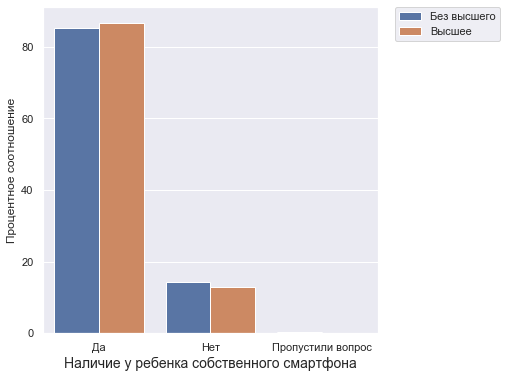

In [216]:
# 1. Вопрос 53


plt.rcParams['figure.figsize'] = [6, 6]
prop_df = (data_mom_edu['q54']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

sns.barplot(x='q54',y='Процентное соотношение',hue='q86mom_edu', data=prop_df).legend(title='Образование матери')
plt.xlabel('Наличие у ребенка собственного смартфона', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [217]:
data_mom_edu.iloc[1:3,225:245]

,q42_3,q42other,q42no,q42other2,q42other3,q43_1,q43_2,q43_3,q43_4,q43_5,q43_6,q43_7,q43_8,q43_9,q43_10,q44_1,q44_2,q44_3,q44_4,q44_5
3,"Да, помогаем разбирать темы, решать задачи и т.д.",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Я слежу за соблюдением всего режима дня,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,0 (никогда),0 (никогда),0 (никогда),6 (постоянно),5
4,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Ел,Ложился спать,Пропустили вопрос,Пропустили вопрос,"Чистил зубы, соблюдал гигиену",Я слежу за соблюдением всего режима дня,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,0 (никогда),1,1,5,3


Text(0, 0.5, 'Процентное соотношение')

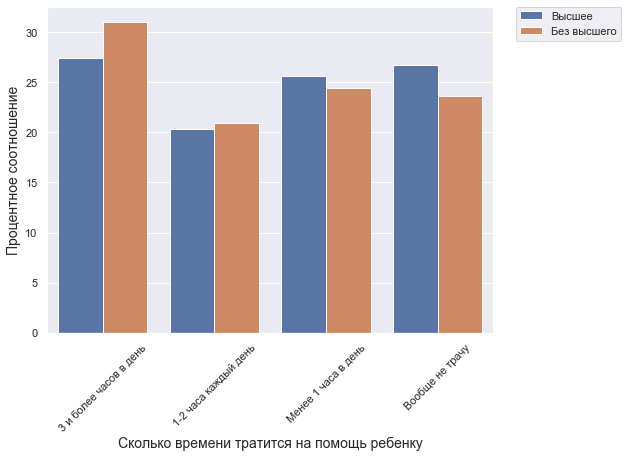

In [14]:
# 4 Вопрос 14
y ='prop'

prop_df = (data_mom_edu['q14']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['prop'] = prop_df['prop']*100

sns.barplot(x='q14',y=y,hue='q86mom_edu', data=prop_df,
            hue_order=['Высшее', 'Без высшего'],
            order=['3 и более часов в день',
                   '1-2 часа каждый день',
                   'Менее 1 часа в день',
                    'Вообще не трачу']).legend(title='Образование матери')
plt.rcParams['figure.figsize'] = [8, 6]
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Сколько времени тратится на помощь ребенку', fontsize=14)
plt.ylabel('Процентное соотношение', fontsize=14)

In [279]:
data_mom_edu.iloc[1:3,135:150]

,q17control,q17clean,q18,q18other1,q18other2,q19,q20h,q20min,q21,q22,q23,q24,q25,q26,q27
3,Реже раза в неделю или не занимается,Реже раза в неделю или не занимается,"Стараемся выполнять полностью все, что требуется",Пропустили вопрос,Пропустили вопрос,"Да, проводит",3,Пропустили вопрос,"Нет, не надо менять",94,"От 1,5 часов до 2 часов","От 1,5 часов до 2 часов","От 1,5 до 2 часов",Больше,Не изменилась
4,Реже раза в неделю или не занимается,5 дней в неделю,"Стараемся выполнять то, на что хватает сил, вр...",Пропустили вопрос,Пропустили вопрос,"Да, проводит",0,25,"Нет, не надо менять",100,Больше 2 часов,"От 1,5 часов до 2 часов",Больше 2 часов,Больше,Не изменилась


In [ ]:
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

([<matplotlib.axis.XTick at 0x1f718661a88>,
 <a list of 5 Text xticklabel objects>)

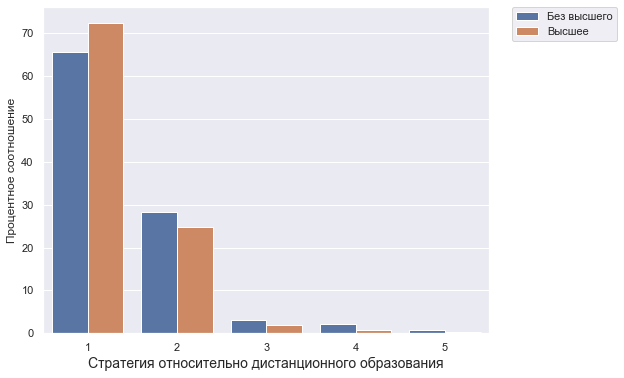

In [278]:
# 5 вопрос 18

y ='prop'
prop_df = (data_mom_edu['q18']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

sns.barplot(x='q18',y='Процентное соотношение',hue='q86mom_edu', data=prop_df).legend(title='Образование матери')
plt.xlabel('Стратегия относительно дистанционного образования', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xticks(np.arange(5), ['1', '2', '3', '4','5'])
# 1 - Стараемся выполнять полностью все, что требуется
# 2 - Стараемся выполнять то, на что хватает сил, времени и ресурсов
# 3 - Решили, что сейчас мы не будем уделять свое время и силы дистанционному обучению, т.к. не можем, предпочитаем
# другие виды занятий или по каким-то другим причинам
# 4 - Другое
# 5 - Пропустили вопрос


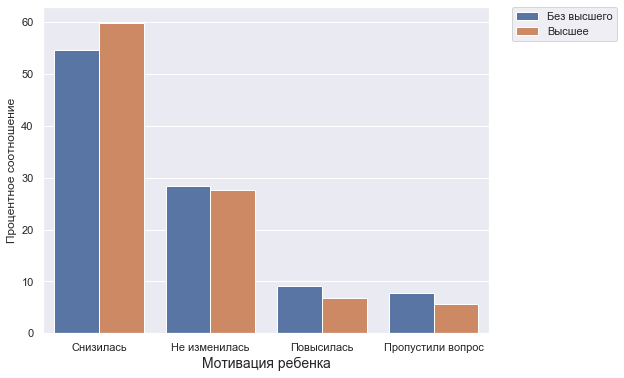

In [219]:
# Вопрос 27

y='prop'
prop_df = (data_mom_edu['q27']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

sns.barplot(x='q27',y='Процентное соотношение',hue='q86mom_edu', data=prop_df).legend(title='Образование матери')
plt.xlabel('Мотивация ребенка', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Процесс адаптации')

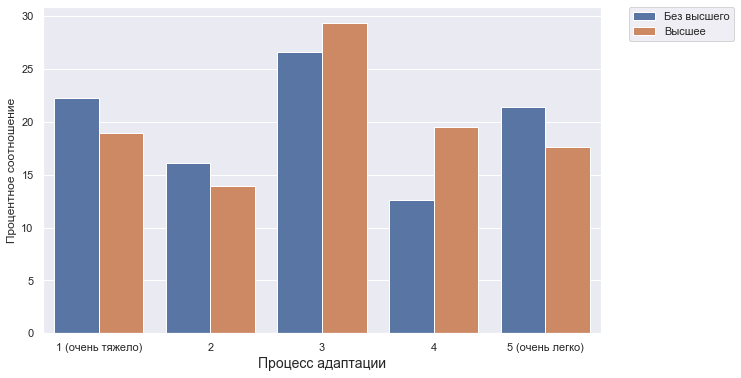

In [220]:
# Вопрос 37
data_mom_edu['q37']
y='prop'
prop_df = (data_mom_edu['q37']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

plt.rcParams['figure.figsize'] = [10, 6]

sns.barplot(x='q37',y='Процентное соотношение',hue='q86mom_edu', 
            order=['1 (очень тяжело)','2','3','4', '5 (очень легко)'],
            data=prop_df).legend(title='Образование матери')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Процесс адаптации', fontsize=14)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

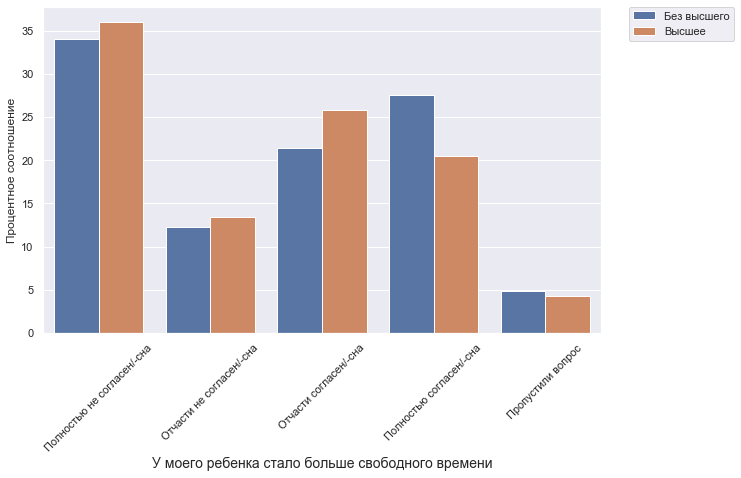

In [222]:
# Вопрос 36_1
prop_df = (data_mom_edu['q36_1']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

plt.rcParams['figure.figsize'] = [10, 6]

sns.barplot(x='q36_1',y='Процентное соотношение',hue='q86mom_edu',
            order = ['Полностью не согласен/-сна', 
                    'Отчасти не согласен/-сна',
                    'Отчасти согласен/-сна',
                    'Полностью согласен/-сна',
                    'Пропустили вопрос'],
            data=prop_df).legend(title='Образование матери')
plt.xlabel('У моего ребенка стало больше свободного времени', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)


In [353]:
data_mom_edu.iloc[1:3,75:95]

,q10platforms,q10dop,q11control_homework,q11interesting,q11help,q11talk,q11plans,q11friends,q11explain,q11help_homework,q11platforms,q11dop,q11movies,q11books,q12googleclassroom,q12mesh,q12yandex_uch,q12yandex_sch,q12ya_class,q12uchi
3,Раз в месяц и реже,Раз в месяц и реже,Ежедневно,Ежедневно,Несколько раз в неделю,Ежедневно,Ежедневно,Ежедневно,Несколько раз в неделю,Несколько раз в неделю,Несколько раз в неделю,Раз в месяц и реже,Раз в 1 или в 2 недели,Раз в месяц и реже,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Яндекс.Школа,ЯКласс,Пропустили вопрос
4,Никогда,Раз в 1 или в 2 недели,Никогда,Ежедневно,Раз в 1 или в 2 недели,Ежедневно,Ежедневно,Несколько раз в неделю,Раз в 1 или в 2 недели,Никогда,Никогда,Никогда,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Пропустили вопрос,МЭШ/РЭШ,Яндекс.Учебник,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос


In [354]:
data_mom_edu.iloc[1:3,60:80]

,q9books_found_to_test,q9books_found_for_add_edu,q9books_found_didnt_use,q9other_found_for_edu,q9other_found_to_test,q9other_found_for_add_edu,q9other_found_didnt_use,q10control_homework,q10interesting,q10help,q10talk,q10plans,q10friends,q10explain,q10help_homework,q10platforms,q10dop,q11control_homework,q11interesting,q11help
3,Пропустили вопрос,Пропустили вопрос,Не использовали,Пропустили вопрос,Для тестирования и оценки уровня знаний ребенка,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,Ежедневно,Несколько раз в неделю,Несколько раз в неделю,Ежедневно,Ежедневно,Ежедневно,Несколько раз в неделю,Раз в 1 или в 2 недели,Раз в месяц и реже,Раз в месяц и реже,Ежедневно,Ежедневно,Несколько раз в неделю
4,Пропустили вопрос,"Для дополнительного образования (то, что не вк...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Не использовали,Никогда,Ежедневно,Несколько раз в неделю,Ежедневно,Ежедневно,Несколько раз в неделю,Раз в 1 или в 2 недели,Раз в 1 или в 2 недели,Никогда,Раз в 1 или в 2 недели,Никогда,Ежедневно,Раз в 1 или в 2 недели


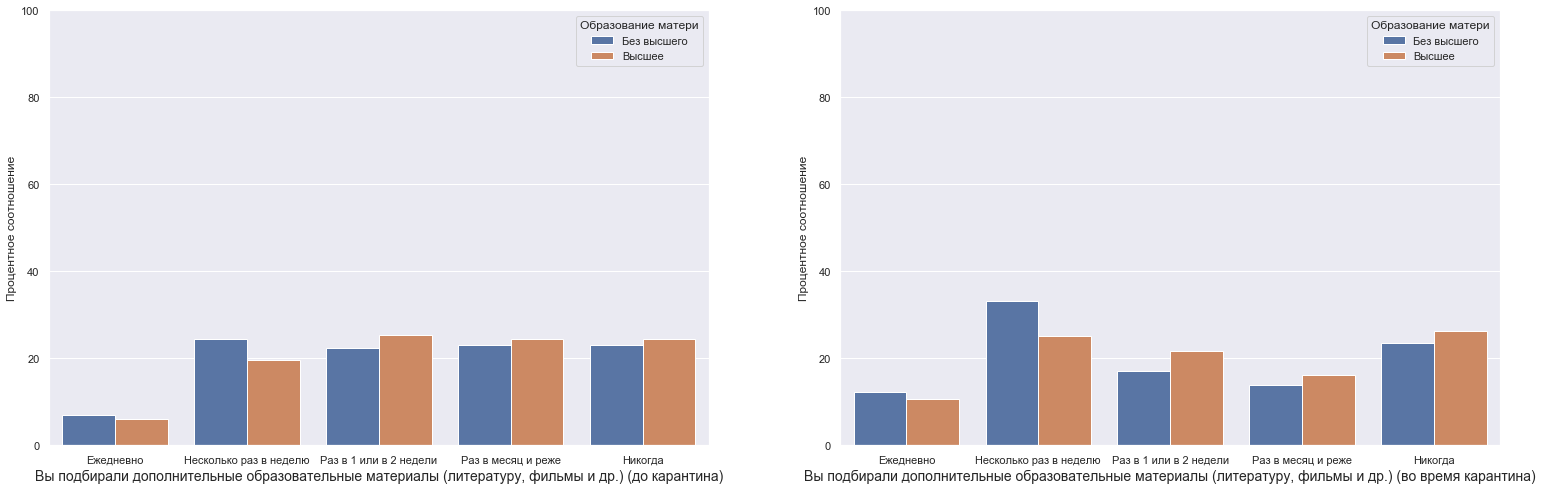

In [458]:
# №6 Вопрос 10-11 (5)

fig, ax =plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [26, 8]

prop_df = (data_mom_edu['q10dop']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q10dop',y='Процентное соотношение',hue='q86mom_edu', 
                order = ['Ежедневно', 
                    'Несколько раз в неделю',
                    'Раз в 1 или в 2 недели',
                    'Раз в месяц и реже',
                    'Никогда'],data=prop_df,ax=ax[0])
g.set(ylim=(0, 100))
g.legend(title='Образование матери')
g.set_xlabel('Вы подбирали дополнительные образовательные материалы (литературу, фильмы и др.) (до карантина)',fontsize=14)

prop_df = (data_mom_edu['q11dop']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q11dop',y='Процентное соотношение',hue='q86mom_edu', 
                order = ['Ежедневно', 
                    'Несколько раз в неделю',
                    'Раз в 1 или в 2 недели',
                    'Раз в месяц и реже',
                    'Никогда'],
                 data=prop_df,ax=ax[1])
g1.set(ylim=(0, 100))

g1.legend(title='Образование матери')

g1.set_xlabel('Вы подбирали дополнительные образовательные материалы (литературу, фильмы и др.) (во время карантина)',fontsize=14)
 
fig.savefig('C:/Users/78904/Desktop/Графики/6/№6 Вопрос 10-11 (10)', bbox_inches='tight')


Text(0.5, 0, 'Вы читаете с ребенком литературу по интересующим ребенка темам на карантине')

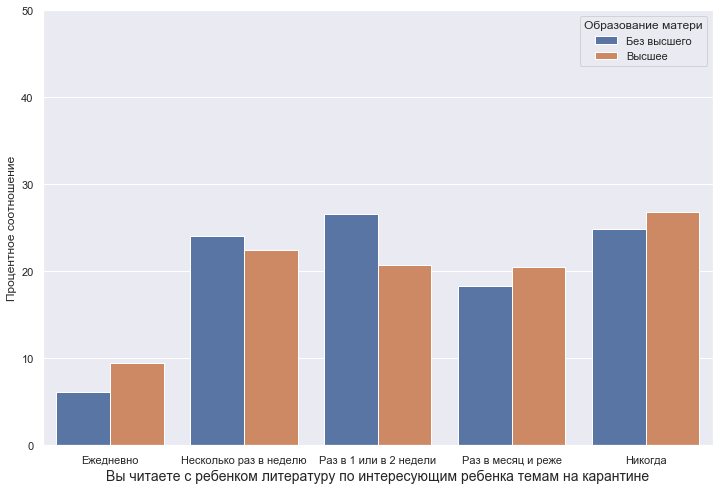

In [499]:
plt.rcParams['figure.figsize'] = [12, 8]

prop_df = (data_mom_edu['q11books']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q11books',y='Процентное соотношение',hue='q86mom_edu', 
                order = ['Ежедневно', 
                    'Несколько раз в неделю',
                    'Раз в 1 или в 2 недели',
                    'Раз в месяц и реже',
                    'Никогда'],
                 data=prop_df)
g1.set(ylim=(0, 50))

g1.legend(title='Образование матери')

g1.set_xlabel('Вы читаете с ребенком литературу по интересующим ребенка темам на карантине',fontsize=14)

In [421]:
data_mom_edu.iloc[1:3,145:160]

,q23,q24,q25,q26,q27,q28,q29,q30,q31teach,q31org,q31support,q31therapy,q31other1,q31other2,q31other3
3,"От 1,5 часов до 2 часов","От 1,5 часов до 2 часов","От 1,5 до 2 часов",Больше,Не изменилась,7 (помощь не требуется),7 (помощь не требовалась),5,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Другое,Пропустили вопрос,моему ребенку не нужна помощь
4,Больше 2 часов,"От 1,5 часов до 2 часов",Больше 2 часов,Больше,Не изменилась,5,2,4,Пропустили вопрос,“Родитель как организатор” - составить расписа...,“Родитель как техническая поддержка” - настраи...,"“Родитель как психолог” - успокаивание, поддер...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос


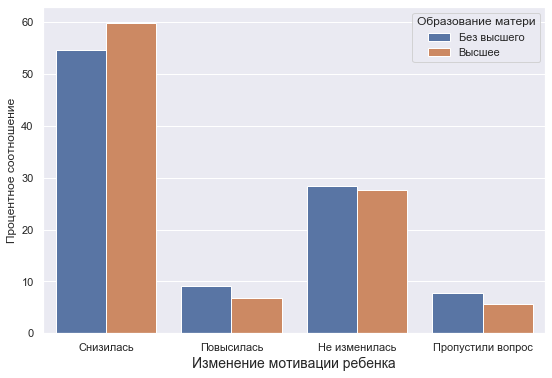

In [463]:
# №7 Вопрос 27


plt.rcParams['figure.figsize'] = [9, 6]

prop_df = (data_mom_edu['q27']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q27',y='Процентное соотношение',hue='q86mom_edu', 
                order = ['Снизилась','Повысилась','Не изменилась','Пропустили вопрос'], data=prop_df)
g.legend(title='Образование матери')
g = plt.xlabel('Изменение мотивации ребенка', fontsize=14)



In [1]:
# №7 Вопрос 28-29
fig, ax =plt.subplots(1,2)

plt.rcParams['figure.figsize'] = [22, 6]

prop_df = (data_mom_edu['q28']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q28',y='Процентное соотношение',hue='q86mom_edu', 
                order = ['1 (очень большой объем)','2','3','4','5','6','7 (помощь не требуется)'], 
                data=prop_df, ax=ax[0])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.legend(title='Образование матери')
g.set_xlabel('Необходимая помощь взрослых на карантине', fontsize=14)
g.set(ylim=(0, 35))

prop_df = (data_mom_edu['q29']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g1 = sns.barplot(x='q29',y='Процентное соотношение',hue='q86mom_edu', 
                order = ['1 (очень большой объем)','2','3','4','5','6','7 (помощь не требовалась)'], 
                data=prop_df, ax=ax[1])
g1.legend(title='Образование матери')
g1.set_xlabel('Необходимая помощь взрослых до карантина', fontsize=14)
g1.set(ylim=(0, 35))



NameError: name 'plt' is not defined

[(0, 50)]

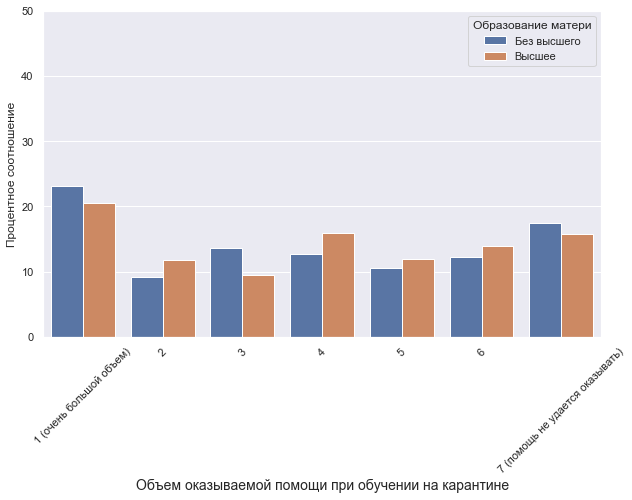

In [486]:
plt.rcParams['figure.figsize'] = [10, 6]

prop_df = (data_mom_edu['q30']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q30',y='Процентное соотношение',hue='q86mom_edu', 
                order = ['1 (очень большой объем)','2','3','4','5','6','7 (помощь не удается оказывать)'], 
                data=prop_df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.legend(title='Образование матери')
g.set_xlabel('Объем оказываемой помощи при обучении на карантине', fontsize=14)
g.set(ylim=(0, 50))

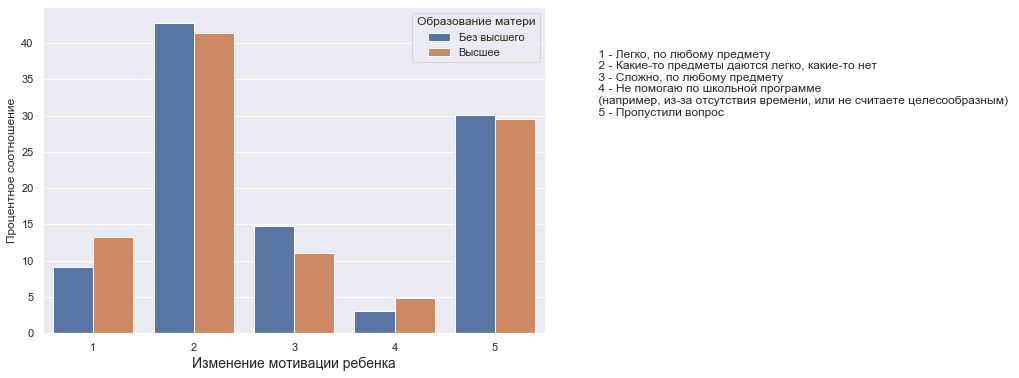

In [566]:
# №0 Вопрос 32


plt.rcParams['figure.figsize'] = [9, 6]

prop_df = (data_mom_edu['q32']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q32',y='Процентное соотношение',hue='q86mom_edu', 
                order = ['Легко, по любому предмету','Какие-то предметы даются легко, какие-то нет','Сложно, по любому предмету',
                         'Не помогаю по школьной программе (например, из-за отсутствия времени, или не считаете целесообразным)',
                         'Пропустили вопрос'],  data=prop_df)
plt.xticks(np.arange(5), ['1', '2', '3', '4','5'])
plt.text(5,30,' 1 - Легко, по любому предмету \n 2 - Какие-то предметы даются легко, какие-то нет \n 3 - Сложно, по любому предмету \n 4 - Не помогаю по школьной программе \n (например, из-за отсутствия времени, или не считаете целесообразным) \n 5 - Пропустили вопрос')
g.legend(title='Образование матери')

g = plt.xlabel('Изменение мотивации ребенка', fontsize=14)


In [568]:
data_mom_edu.iloc[1:3,180:200]

,q34_10,q34_11,q34_12,q34other1,q34other2,q34other3,q35_1,q35_2,q35_3,q35_4,q35_5,q35_6,q36_1,q36_2,q36_3,q36_4,q36_5,q36_6,q36_7,q37
3,Пропустили вопрос,Пропустили вопрос,Не испытываю трудностей,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Полностью согласен/-сна,Полностью согласен/-сна,Полностью не согласен/-сна,Полностью согласен/-сна,Полностью согласен/-сна,Полностью согласен/-сна,Полностью согласен/-сна,Полностью не согласен/-сна,Полностью не согласен/-сна,Отчасти согласен/-сна,Отчасти согласен/-сна,Отчасти согласен/-сна,Полностью согласен/-сна,5 (очень легко)
4,Ребенок и другие члены семьи мешают друг другу...,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Полностью согласен/-сна,Отчасти согласен/-сна,Отчасти не согласен/-сна,Отчасти согласен/-сна,Полностью согласен/-сна,Полностью согласен/-сна,Отчасти не согласен/-сна,Отчасти согласен/-сна,Отчасти согласен/-сна,Полностью согласен/-сна,Отчасти не согласен/-сна,Отчасти не согласен/-сна,Полностью не согласен/-сна,4


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

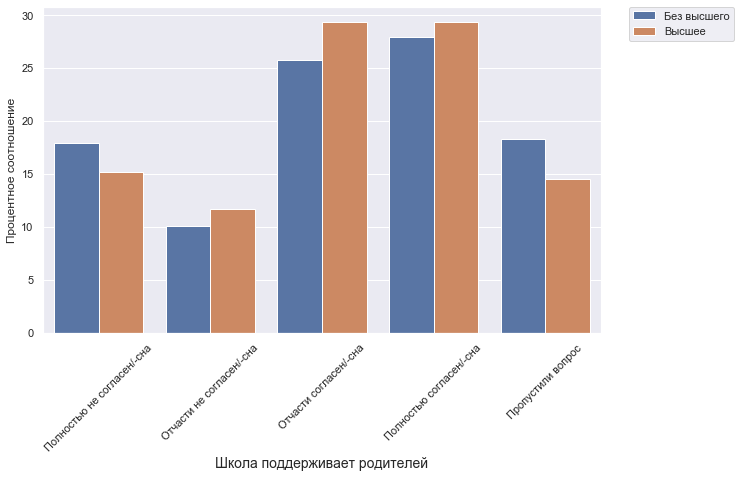

In [576]:
# №10 Вопрос 35_1

prop_df = (data_mom_edu['q35_6']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

plt.rcParams['figure.figsize'] = [10, 6]

sns.barplot(x='q35_6',y='Процентное соотношение',hue='q86mom_edu',
            order = ['Полностью не согласен/-сна', 
                    'Отчасти не согласен/-сна',
                    'Отчасти согласен/-сна',
                    'Полностью согласен/-сна',
                    'Пропустили вопрос'],
            data=prop_df).legend(title='Образование матери')
plt.xlabel('Школа поддерживает родителей', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

[(0, 100)]

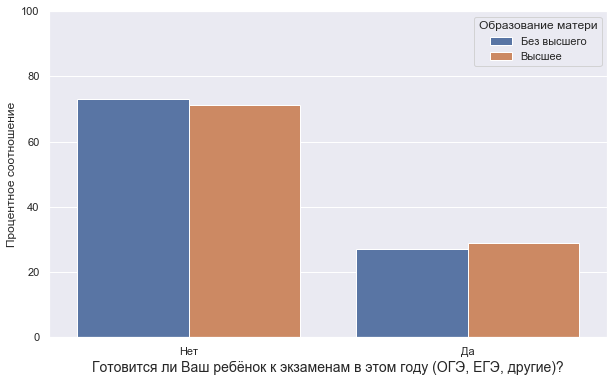

In [565]:
# №9 Вопрос 40

plt.rcParams['figure.figsize'] = [10, 6]

prop_df = (data_mom_edu['q40']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['Процентное соотношение'] = prop_df['prop']*100

g = sns.barplot(x='q40',y='Процентное соотношение',hue='q86mom_edu', 
                #order = ['1 (очень большой объем)','2','3','4','5','6','7 (помощь не удается оказывать)'], 
                data=prop_df)

g.legend(title='Образование матери')
g.set_xlabel('Готовится ли Ваш ребёнок к экзаменам в этом году (ОГЭ, ЕГЭ, другие)?', fontsize=14)
g.set(ylim=(0, 100))

In [637]:
data_mom_edu['q22'] = pd.to_numeric(data_mom_edu['q22'])

In [593]:
data_mom_edu.iloc[1:3,140:160]

,q19,q20h,q20min,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31teach,q31org,q31support,q31therapy,q31other1,q31other2,q31other3
3,"Да, проводит",3,Пропустили вопрос,"Нет, не надо менять",94,"От 1,5 часов до 2 часов","От 1,5 часов до 2 часов","От 1,5 до 2 часов",Больше,Не изменилась,7 (помощь не требуется),7 (помощь не требовалась),5,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Другое,Пропустили вопрос,моему ребенку не нужна помощь
4,"Да, проводит",0,25,"Нет, не надо менять",100,Больше 2 часов,"От 1,5 часов до 2 часов",Больше 2 часов,Больше,Не изменилась,5,2,4,Пропустили вопрос,“Родитель как организатор” - составить расписа...,“Родитель как техническая поддержка” - настраи...,"“Родитель как психолог” - успокаивание, поддер...",Пропустили вопрос,Пропустили вопрос,Пропустили вопрос


In [652]:
tips = sns.load_dataset("tips")
tips.head()
ax = sns.barplot(x="day", y="total_bill", data=tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 0, 'Какую долю того, что задается школой для самостоятельного изучения и выполнения,\n ребенок выполняет?(сам или вместе с членами семьи)')

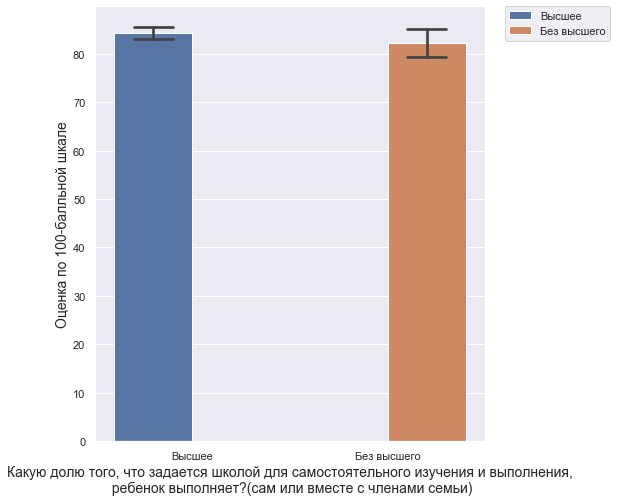

In [668]:
# №5 Вопрос 22

plt.rcParams['figure.figsize'] = [7, 8]
g = sns.barplot(x='q86mom_edu',y='q22', data=data_mom_edu, capsize=.2, hue='q86mom_edu')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set_ylabel('Оценка по 100-балльной шкале',  fontsize=14)
g.set_xlabel('Какую долю того, что задается школой для самостоятельного изучения и выполнения,\n ребенок выполняет?(сам или вместе с членами семьи)', fontsize=14)